In [1]:
# Mai Xuan Bach

In [1]:
pip install opencv-python

In [2]:
import pandas as pd

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import cv2

## Bài 1


In [5]:
data = pd.read_csv("./Entry_test_data/data_linear_1.csv")
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


Text(0, 0.5, 'Giá nhà')

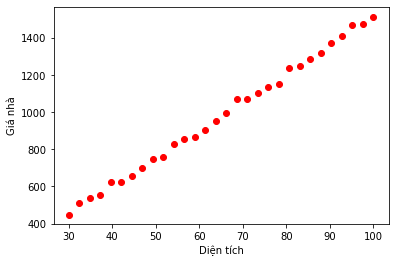

In [6]:
x = np.array(data["Diện tích"]).reshape(-1, 1)
y = np.array(data["Giá"]).reshape(-1, 1)

plt.scatter(x, y, color = "red")
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')

## Bài 2

In [8]:
image = cv2.imread('./Entry_test_data/image.png')         #read the image

#print(image.shape)
height, width, channel = image.shape    #get the image shape to know its height, width and channel (colors)

#print('width: ', width)
#print('height:', height)

cv2.imshow("Base image", image)      #test showing base image
cv2.waitKey(0)                  #press key "0" to shut down the image windows
cv2.destroyAllWindows()

In [9]:

def crop_image(img, cropped_height, cropped_width):
    """
    :param img: base image read by cv2.imread()
    :param cropped_height: new height (int type)
    :param cropped_width: new width (int type)
    :return: the image that is cropped
    """

    cropped_image = img[0:cropped_height, 0:cropped_width]

    cv2.imshow('Cropped image', cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return cropped_image

def resize_image(img, resized_height, resized_width):
    """
    Resize by lowering the image pixels
    
    :param img: base image read by cv2.imread()
    :param resized_height: new height (int type)    
    :param resized_width: new width (int type)
    :return image that is resized
    """

    resized_image = cv2.resize(img, (resized_width, resized_height), interpolation=cv2.INTER_AREA)
    # INTER_AREA interpolation method: resampling using pixel area relation

    cv2.imshow('resized image', resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return resized_image

def gaussian_blurring(img, kernel_size):
    """
    Smoothing the image by applying Gaussian blur method

    :param img: base iamge read by cv2.imread()
    :param kernel_size: a tuple (x,y); x,y are positive and odd; higher x,y -> more blurred
    :return: the image that is smoothed
    """

    blurred_image = cv2.GaussianBlur(img, kernel_size, cv2.BORDER_DEFAULT)
    #third param is type of border (use default)

    cv2.imshow('Blurred image', blurred_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return blurred_image

def detect_edges_sobel(img):
    """
    Detect edges by using Sobel method
    :param img: base image read by cv2.imread()
    :return: three types of Sobel method [X, Y, XY]
    """
    #Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), cv2.BORDER_DEFAULT)

    ## Sobel Edge Detection

    #Sobel Edge Detection on the X axis
    sobelx_img = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    #ddepth specifies the precision of the output image
    #dx and dy specify the order of the derivative in each direction

    #Sobel Edge Detection on the Y axis
    sobely_img = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

    #Combined X and Y Sobel Edge Detection
    sobelxy_img = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

    cv2.imshow('Sobel X', sobelx_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    cv2.imshow('Sobel Y', sobely_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    cv2.imshow('Sobel XY', sobelxy_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return sobelx_img, sobely_img, sobelxy_img

def detect_edges_canny(img, threshold1, threshold2):
    """
    Detect edges by using Canny method
    :param img: base image read by cv2.imread()
    :return: Canny Edge Detection Image
    """
    #Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), cv2.BORDER_DEFAULT)

    canny_edges_img = cv2.Canny(image=img_blur, threshold1=threshold1, threshold2=threshold2)
    #gradient magnitude value of pixel < threshold1 => be EXCLUDED in the final edge map
    #gradient magnitude value of pixel > threshold2 => be INCLUDED in the final edge map

    cv2.imshow('Canny edges', canny_edges_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return canny_edges_img


In [10]:
#1. Crop the 1/4 top left corner of the image
#Do it by slicing the image
cropped_height = int(height/2)
cropped_width = int(width/2)

crop_image(image, cropped_height, cropped_width)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 49, 199, 255],
        [ 12, 117,  72],
        [  0,  79,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 55, 227, 255],
        [ 10, 117,  66],
        [  0,  75,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 51, 215, 255],
        [ 10, 110,  60],
        [  0,  72,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 233, 255],
        [ 94, 193, 218],
        [  0,  73,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 42, 134,  98],
        [ 31, 122,  73],
        [  0,  79,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  70,   0],
        [  0,  74,   0],
        [  0,  84,   0]]

In [11]:
#2. Resize half height, width of the image
resized_height = int(height/2)
resized_width = int(width/2)

resize_image(image, resized_height, resized_width)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
#3. Gaussian Blurring
kernel_size = (7,7)

blurred_image = gaussian_blurring(image, kernel_size)

In [13]:
#4. detect "edges" in the image
detect_edges_sobel(image)
detect_edges_canny(image, 5, 15)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)